# Autolib electric car-sharing service company

## 1. Defining the Question

### a) Specifying the Data Analytic Question

To investigate a claim about the blue cars from the provided Autolib dataset.

Claim: The number of Bluecars taken on Sunday (day 6) different than on Saturday (day 5)

### b) Defining the Metric for Success

Accept or reject the Null hypothesis

### c) Understanding the context

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

To work on this project, we will perform the following analysis with Python; 

* Find and deal with outliers, anomalies, and missing data within the dataset.
* Plot appropriate univariate and bivariate summaries recording our observations.
* Implement the solution by performing hypothesis testing.




### d) Recording the Experimental Design

The following list depicts the steps taken to answer the analysis question.
1. Data sourcing/loading.
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preperation
6. Univariate Analysis
7. Bivariate Analysis
8. Perform hypothesis testing
9. Follow up questions.


### e) Data Relevance

* The data should have variables that adequately contribute to answering the target question.

## 2. Importing the Libraries

In [92]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk
from scipy import stats
import os
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
from scipy.stats.morestats import Mean
import scipy
import math
import scipy.stats
import statistics
warnings.filterwarnings('ignore')

## 3. Loading the Dataset

In [93]:
# Dataset Loading
url = "http://bit.ly/DSCoreAutolibDataset"
df = pd.read_csv(url)

## 4. Data Understanding

Number of records.

In [94]:
print(f'The dataset has {df.shape[0]} records, and {df.shape[1]} columns.')

The dataset has 16085 records, and 13 columns.


Dataset Preview.

In [95]:
# First five records
df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [96]:
# Last five records
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


Dataset information summary.

In [97]:
# Dataset infromation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


The columns have the correct data types.

## 5. External Data Source Validation

None

## 6. Data Preperation

### a) Validation

In [98]:
# Dropping irrelevant columns to our study
df.drop(columns=['Postal code','date','n_daily_data_points','day_type','BlueCars_returned_sum','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum'],axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   dayOfWeek           16085 non-null  int64
 1   BlueCars_taken_sum  16085 non-null  int64
dtypes: int64(2)
memory usage: 251.5 KB


### b) Completeness

**Dropping Values**

In [99]:
# Checking for the presence of missing values.
df.isnull().sum()

dayOfWeek             0
BlueCars_taken_sum    0
dtype: int64

In [100]:
# Checking nan value rows
df[df.dayOfWeek.isnull()][['dayOfWeek', 'BlueCars_taken_sum']]

,dayOfWeek,BlueCars_taken_sum


In [101]:
# Viewing columns 
df.columns

Index(['dayOfWeek', 'BlueCars_taken_sum'], dtype='object')

In [102]:
# Checking overall changes
df.isnull().sum()


dayOfWeek             0
BlueCars_taken_sum    0
dtype: int64

As the data has a large number of records, to maintain the state of the sample, the missing values will be dropped.

In [103]:
# Dropping missing values.
df.dropna(inplace = True)

In [104]:
# Confirming changes.
df.isnull().any().any()

False

All missing values have been removed.

### c) Consistency

In [105]:
# Checking for duplicates.
df.duplicated().any().any()

True

Will not drop the duplicates because the entries should not be unique i.e for any day we can have the same number of Bluecars taken. 

### d) Uniformity

Renaming columns.

In [106]:
# Function definition.
def RenameColumns(columns, data):
  new_name = []
  for col in columns:
    col = col.lower().replace(" ","_")
    new_name.append(col)
  data.columns = new_name

# Function call.
RenameColumns(list(df.columns), df)

In [107]:
# Confirming column name change.
df.columns

Index(['dayofweek', 'bluecars_taken_sum'], dtype='object')

In [108]:
# Confirming changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16085 entries, 0 to 16084
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   dayofweek           16085 non-null  int64
 1   bluecars_taken_sum  16085 non-null  int64
dtypes: int64(2)
memory usage: 377.0 KB


### e) Outliers

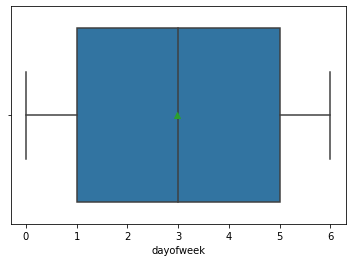

In [109]:
# Checking for outliers
sns.boxplot(df.dayofweek, showmeans=True)

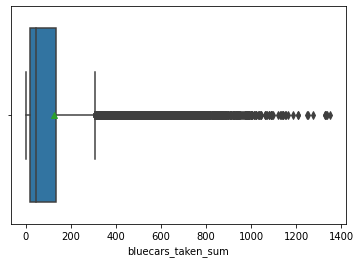

In [110]:
# Checking for outliers
sns.boxplot(df.bluecars_taken_sum, showmeans=True)

Removing outliers to minimize skew.

In [111]:
# New dataset
df_cleaned = df.copy()

In [112]:
# IQR

Q1 = df_cleaned['bluecars_taken_sum'].quantile(0.25)
Q3 = df_cleaned['bluecars_taken_sum'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[~((df_cleaned['bluecars_taken_sum'] < (Q1 - 1.5 * IQR)) |(df_cleaned['bluecars_taken_sum'] > (Q3 + 1.5 * IQR)))]

In [113]:
# Confirming changes
outliers = df.shape[0] - df_cleaned.shape[0]
print(f'Outliers removed = {outliers}')


Outliers removed = 2215


## 7. Descriptive Analysis

In [114]:
# Dataset summary statistics
df_cleaned.describe()

,dayofweek,bluecars_taken_sum
count,13870.000000,13870.000000
mean,2.935761,61.834247
std,2.003814,66.510307
min,0.000000,0.000000
25%,1.000000,17.000000
50%,3.000000,37.000000
75%,5.000000,81.000000
max,6.000000,307.000000


### a) Univariate Analysis

Plots

0    2079
1    2076
3    1984
2    1976
4    1957
6    1921
5    1877
Name: dayofweek, dtype: int64


Text(0.5, 1.0, 'Number of BlueCars taken per Day')

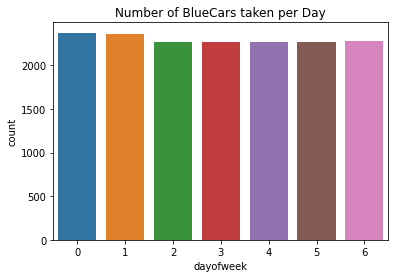

In [115]:
# Bar charts
df1 = df_cleaned.dayofweek.value_counts()
print(df1)
ax = sns.countplot(x="dayofweek",data=df)
plt.title("Number of BlueCars taken per Day")

**Measures of central tendency**

In [116]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")
    

In [117]:
# Mean
MeasureCentral('mean', df_cleaned.columns, df_cleaned)

dayofweek column mean = 2.9357606344628695
bluecars_taken_sum column mean = 61.83424657534247


In [118]:
# Median
MeasureCentral('median', df_cleaned.columns, df_cleaned)

dayofweek column median = 3.0
bluecars_taken_sum column median = 37.0


In [119]:
# Mode
MeasureCentral('mode', df_cleaned.columns, df_cleaned)

dayofweek column mode = 0    0
dtype: int64
bluecars_taken_sum column mode = 0    12
dtype: int64


**Measures of distribution**

In [120]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [121]:
# Range
MeasureDistribution('range', df_cleaned.columns, df_cleaned)

dayofweek column range = 6
bluecars_taken_sum column range = 307


In [122]:
# IQR
MeasureDistribution('IQR', df_cleaned.columns, df_cleaned)

dayofweek column IQR = 4.0
bluecars_taken_sum column IQR = 64.0


In [123]:
# Variance
MeasureDistribution('var', df_cleaned.columns, df_cleaned)

dayofweek column variance = 4.0152687811165695
bluecars_taken_sum column variance = 4423.620876261946


In [124]:
# Standard Deviation
MeasureDistribution('std', df_cleaned.columns, df_cleaned)

dayofweek column std = 2.003813559470184
bluecars_taken_sum column std = 66.51030654163267


In [125]:
# Skewness
MeasureDistribution('skew', df_cleaned.columns, df_cleaned)

dayofweek column skew = 0.0435478890769489
bluecars_taken_sum column skew = 1.7986075163894004


In [126]:
# Kurtosis
MeasureDistribution('kurt', df_cleaned.columns, df_cleaned)

dayofweek column kurt = -1.2510189622933838
bluecars_taken_sum column kurt = 2.816117293195045


bluecars_taken_sum is Leptokurtic, as it have more distribution than that of a normal distribution (Kurtosis = 0).

* All outliers have been removed.
* The bluecars_taken_sum column is skew but follows a normal distribution

### b) Bivariate Analysis

Scatter Plots

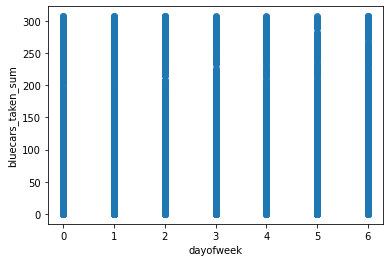

In [127]:
sns.regplot(x = df_cleaned.dayofweek, y = df_cleaned.bluecars_taken_sum, fit_reg=False)

* there is no relationship between dayofweek and bluecars_taken_sum

Correlation

In [128]:
coeff = df_cleaned["dayofweek"].corr(df_cleaned["bluecars_taken_sum"]) 
print(coeff)

0.04911451257639323


* dayofweek is not correlated to bluecars_taken_sum

## Hypothesis Testing

### Step 1: Specify the Null Hypothesis

Null Hypothesis, H0: The number of blue cars taken on saturday is equal to the number of blue cars taken on Sunday. 

### Step 2: Specify the Alternative Hypothesis

Alternative Hypothesis, H1:The number of blue cars taken on Saturday is not equal to the number of blue cars taken on Sunday.

### Step 3: Set the Significance Level (a)

The significance level (denoted by the Greek letter alpha— a) is set at 0.05.  This means that there is a 5% chance that we will accept our alternative hypothesis when our null hypothesis is actually true. The smaller the significance level, the greater the burden of proof needed to reject the null hypothesis, or in other words, to support the alternative hypothesis.

### Step 4: Calculate the Test Statistic and Corresponding P-Value

For this study, we will use T-statitics with the following assumptions:
* The scale of measurement applied to the data set follows a continuous or ordinal scale, such as the scores for an IQ test.
* A simple random sample, that the data is collected from a representative, randomly selected portion of the total population.
* The data, when plotted, results in a normal distribution, bell-shaped distribution curve. When a normal distribution is assumed, one can specify a level of probability (alpha level, level of significance, p) as a criterion for acceptance. 
Reasonably large sample size is used. Larger sample size means the distribution of results should approach a normal bell-shaped curve.
* The homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.


Saturday descriptive statistics

In [129]:
# Clustering the saturday dataset and descriptive statistics
df_sat = df[df['dayofweek'] == 5]

In [130]:
# Random Sampling
subset_sat = df_sat.sample(2000)
subset_sat.shape

(2000, 2)

In [131]:
# Getting the sample details
subset_sat.describe()

,dayofweek,bluecars_taken_sum
count,2000.0,2000.000000
mean,5.0,155.257000
std,0.0,229.109182
min,5.0,0.000000
25%,5.0,23.000000
50%,5.0,58.000000
75%,5.0,161.250000
max,5.0,1352.000000


Sunday descriptive statistics

In [132]:
# Clustering the sunday dataset and descriptive statistics
df_sun = df[df['dayofweek'] == 6]

In [133]:
# Getting the population details
df_sun.describe()

,dayofweek,bluecars_taken_sum
count,2274.0,2274.000000
mean,6.0,146.071240
std,0.0,206.289498
min,6.0,0.000000
25%,6.0,27.000000
50%,6.0,59.000000
75%,6.0,152.000000
max,6.0,1164.000000


In [135]:
# Parameters
sample_mean= 155.257
pop_mean=146.0712
std=229.1092
n=2000
df=n-1
alpha=0.05

#define the t score
t=(sample_mean-pop_mean)/(std/math.sqrt(n))
print(t)

#determine the p-value
p=scipy.stats.t.sf(abs(t),df)*2
print(p)

#hypothesis
#H0: m=146.07 vs H1: M!=146.07
if p>= alpha:
  print('Accept H0: there evidence that The number of blue cars taken on saturday is equal to the number of blue cars taken on Sunday.')
else:
  print('Reject H0: there evidence that the number of blue cars taken on saturday is not equal to the number of blue cars taken on Sunday.')

1.79303783765275
0.07311800223205009
Accept H0: there evidence that The number of blue cars taken on saturday is equal to the number of blue cars taken on Sunday.


### Step 5: Drawing a Conclusion

* P-value <= significance level (a) => Reject our null hypothesis in favor of our alternative hypothesis.  Our result is statistically significant.
* P-value > significance level (a) => Fail to reject our null hypothesis.  Our result is not statistically significant.
* Since our P-value > significance level (a), we fail to reject our null hypothesis and conclude that:
* There is evidence that the number of blue cars taken on Saturday is equal to the number of blue cars taken on Sunday.


## Follow Up Questions

### a). Did we have the right data?

Yes, we have the right data as it has the variables that were required for this hypothesis testing

### b). Do we need other data to answer our question?

No

### c). Did we have the right question?

Yes